Analysis of Fandango Movie Rating to determine whether Hickey's analysis in 2015 has led to a more unbiased ratings system/representation to consumers. The data that has been sampled after 2015 is representative of only the 214 most popular movies from January 2016 - March 2017. Hickey's data from the time of publishing his analysis and before only represents movies that had at least 30 movie reviews on Fandango along with having reviews present on other major competitors sites: Metacritic, RottenTomatoes, and IMDB. So this analysis can only offer insight if there was a change from Fandango's biased representation of movie ratings on their sites for popular movies. We have chosen to compare movie ratings from 2015 versus movie ratings from 2016 as a proxy to represent the population and larger question of whether Fandango's movie ratings became more aligned with actual fan reviews on their website. 

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [55]:
before_data = pd.read_csv("fandango_score_comparison.csv")
before_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [56]:
after_data = pd.read_csv("movie_ratings_16_17.csv")
after_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [57]:
hickey_useful = before_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
hickey_useful.head()


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [58]:
after_useful = after_data[['movie', 'year', 'fandango']]
after_useful.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Determine below whether movies in both datasets are popular based on criteria of upwards of 30 votes on Fandango, will have to randomly sample ten movies from 2016-2017 data to see if they pass this criteria, because fandango votes is not included int hat dataset. 

In [59]:
hickey_useful['Fandango_votes'].min()
#all movies from hickey data have upwards of 30 votes

35

In [60]:
after_useful.sample(10, random_state = 1)
#after manually looking up these ten randomly sampled movies on Fandango's website, found that they all had over 30 movie reviews.

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


We will isolate 2015 and 2016 movie review data seperately and use these a proxy in order to perform our comparison. 

In [61]:
movies_2016 = after_useful[after_useful['year'] == 2016]

In [62]:
#check to make sure all hickey movies are form 2015
movies_year = hickey_useful['FILM'].str[-6:]
movies_year.value_counts()

(2015)    129
(2014)     17
Name: FILM, dtype: int64

In [63]:
#We will need to remove movies from the hickey data that are from 2014.

In [64]:
#Function to extract year from hickey data
def get_year(string): 
    find = re.search('\d{4}', string).group()
    return find


hickey_useful['Year'] = hickey_useful['FILM'].apply(get_year)
movies_2015 = hickey_useful[hickey_useful['Year']=='2015']


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now we have our dataframe's (movies_2015 and movies_2016) in place and we can begin to compare the two datasets.

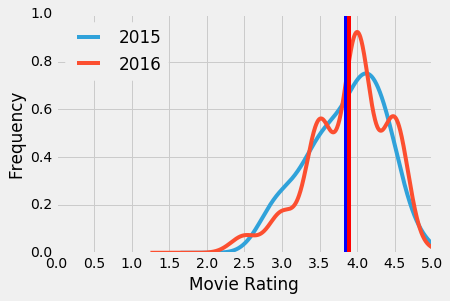

In [65]:
plt.style.use('fivethirtyeight')
movies_2015['Fandango_Ratingvalue'].plot.kde(legend=True, label = '2015')
movies_2016['fandango'].plot.kde(legend=True, label = '2016')
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.axvline(movies_2015['Fandango_Ratingvalue'].mean(), color='blue')
plt.axvline(movies_2016['fandango'].mean(), color='red')
plt.show()
plt.legend()

The 2016 movie ratings do seem more positively skewed than the 2015 ratings. However the two vertical lines above are 2015 mean(blue) and 2016 mean(red) Fandango ratings for popular movies demonstrating that the distributions are centered around similar means. 

In [66]:
movies_2015['Fandango_Ratingvalue'].value_counts(normalize=True, bins=5).sort_index(ascending=False)

(4.38, 4.8]      0.162791
(3.96, 4.38]     0.310078
(3.54, 3.96]     0.248062
(3.12, 3.54]     0.162791
(2.697, 3.12]    0.116279
Name: Fandango_Ratingvalue, dtype: float64

In [67]:
movies_2016['fandango'].value_counts(normalize=True, bins=5).sort_index(ascending=False)

(4.5, 5.0]                   0.005236
(4.0, 4.5]                   0.246073
(3.5, 4.0]                   0.403141
(3.0, 3.5]                   0.240838
(2.4970000000000003, 3.0]    0.104712
Name: fandango, dtype: float64

In [68]:
mean15 = movies_2015['Fandango_Ratingvalue'].mean()
median15 = movies_2015['Fandango_Ratingvalue'].median()
mode15 = movies_2015['Fandango_Ratingvalue'].mode()[0]

In [69]:
summary = pd.DataFrame()
summary['2015'] = [mean15, median15, mode15]

In [70]:
mean16 = movies_2016['fandango'].mean()
median16 = movies_2016['fandango'].median()
mode16 = movies_2016['fandango'].mode()[0]

summary['2016'] = [mean16, median16, mode16]
summary.index = ['mean', 'median', 'mode']

([<matplotlib.axis.YTick at 0x7f2cbb198198>,
 <a list of 11 Text yticklabel objects>)

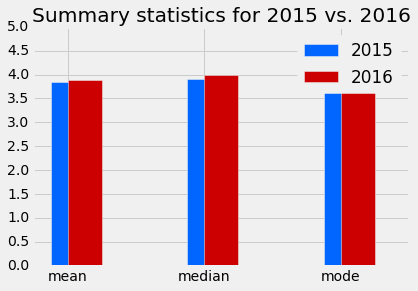

In [75]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25,legend=True)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,rot=0,legend=True)
plt.title('Summary statistics for 2015 vs. 2016')

plt.ylim(0.0, 5.0)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])